# **import Libarary**

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# **Load Data**

In [48]:
data=pd.read_csv('heart.csv')
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# **Data Analysis**

In [50]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [51]:
data.shape

(303, 14)

In [52]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [53]:
data['target_names'] = data['output'].map({0:'Yes',1:'No'})
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,target_names
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,No
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,No
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,No
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,No
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,No


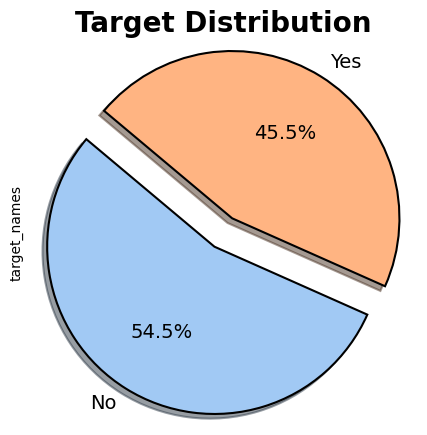

In [54]:
plt.figure(figsize=(5, 5))
palette_color = sns.color_palette('pastel')
explode = [0.1 for _ in range(data['target_names'].nunique())]

target_counts = data.groupby('target_names')['target_names'].count()

target_counts.plot.pie(
    colors=palette_color,
    explode=explode,
    autopct="%1.1f%%",
    shadow=True,
    startangle=140,
    textprops={'fontsize': 14},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

plt.title('Target Distribution', fontsize=20, weight='bold')
plt.axis('equal')
plt.show()

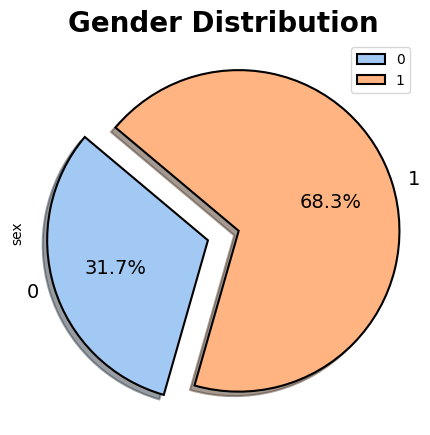

In [55]:
plt.figure(figsize=(5, 5))
palette_color = sns.color_palette('pastel')
explode = [0.1 for _ in range(data['sex'].nunique())]

target_counts = data.groupby('sex')['sex'].count()

target_counts.plot.pie(
    colors=palette_color,
    explode=explode,
    autopct="%1.1f%%",
    shadow=True,
    startangle=140,
    textprops={'fontsize': 14},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

plt.title('Gender Distribution', fontsize=20, weight='bold')
plt.axis('equal')
plt.legend()
plt.show()

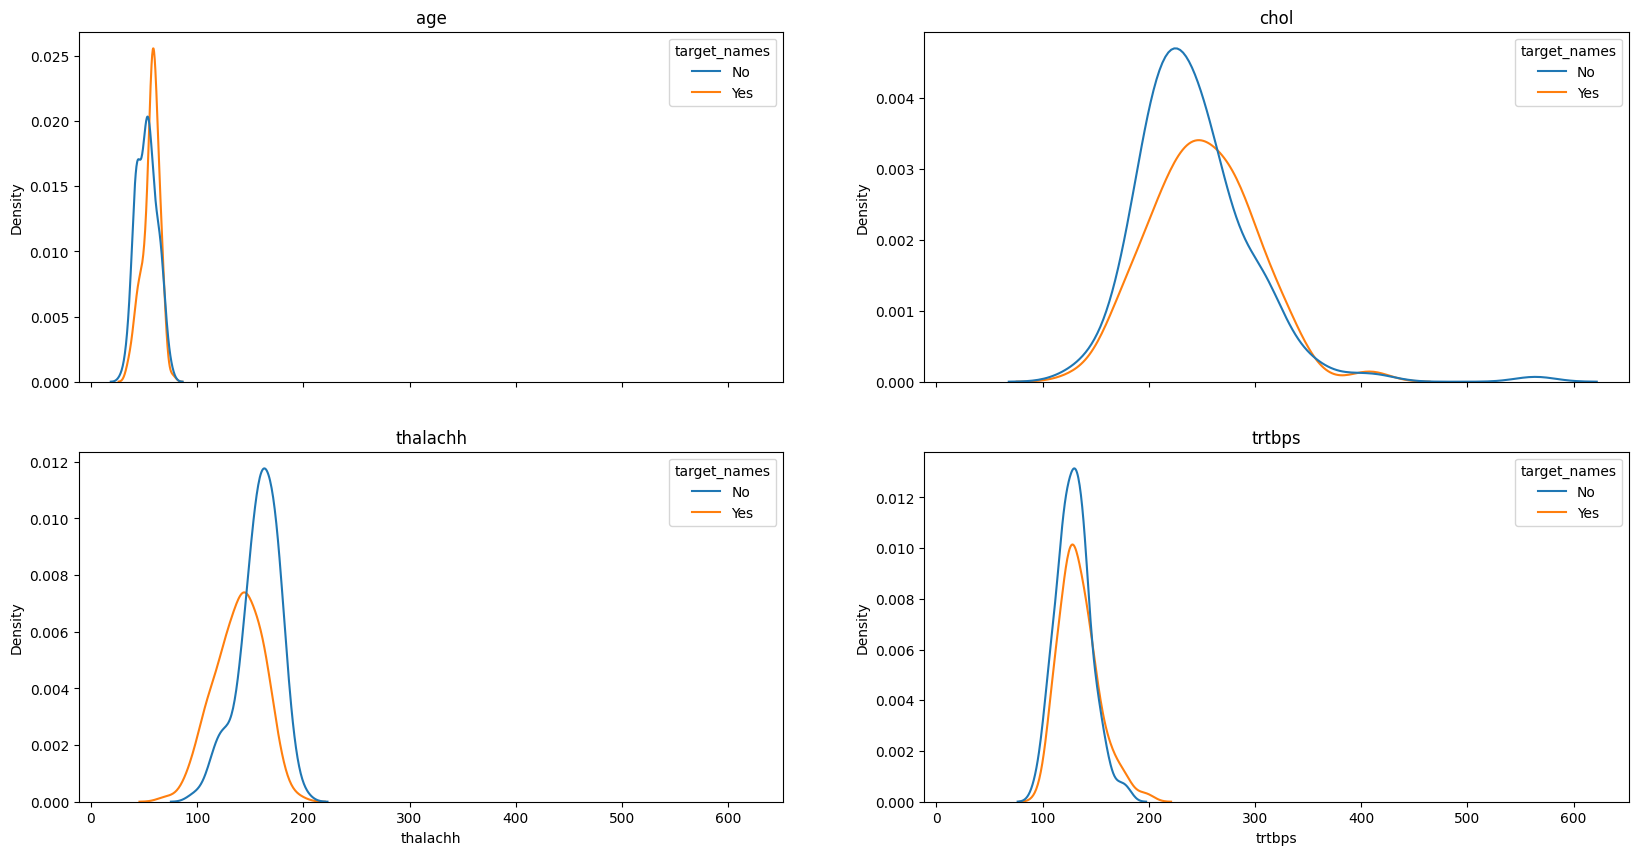

In [56]:
fig, axes = plt.subplots(2,2,sharex=True, figsize=(20,10))

sns.kdeplot(data=data, x='age', hue='target_names', ax=axes[0,0]);
axes[0,0].set_title('age');

sns.kdeplot(data=data, x='chol', hue='target_names', ax=axes[0,1]);
axes[0,1].set_title('chol');

sns.kdeplot(data=data, x='thalachh', hue='target_names', ax=axes[1,0]);
axes[1,0].set_title('thalachh');

sns.kdeplot(data=data, x='trtbps', hue='target_names', ax=axes[1,1]);
axes[1,1].set_title('trtbps');

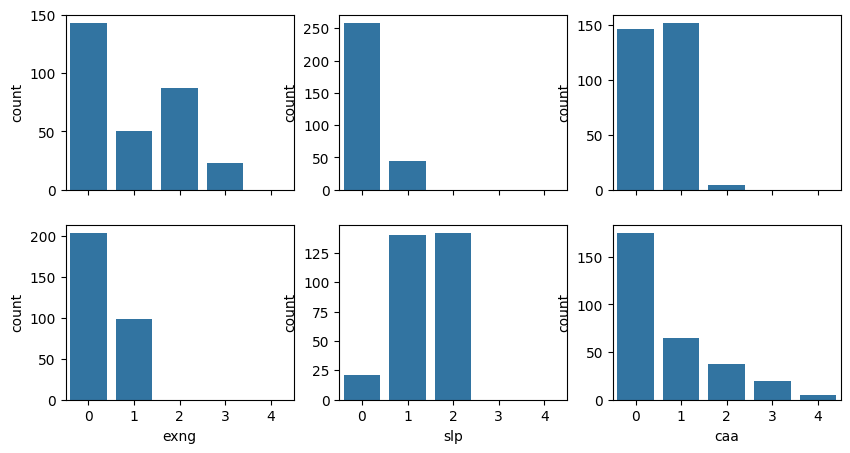

In [57]:
fig, axes = plt.subplots(2,3,sharex=True, figsize=(10,5))
sns.countplot(data = data, x='cp',  ax=axes[0,0]);
sns.countplot(data = data, x='fbs', ax=axes[0,1]);
sns.countplot(data = data, x='restecg', ax=axes[0,2]);
sns.countplot(data = data, x='exng', ax=axes[1,0]);
sns.countplot(data = data, x='slp', ax=axes[1,1]);
sns.countplot(data = data, x='caa', ax=axes[1,2]);

# **Data preparation**

In [58]:
x= data.drop(['output','target_names'],axis=1)
y=data['output']

In [59]:
smoteenn = SMOTEENN()
X_new, y_new = smoteenn.fit_resample(x, y)

# **Split & Scale Data**

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state= 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(69, 13)
(18, 13)
(69,)
(18,)


In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# **Models**

In [62]:
models = {
    'RF' : RandomForestClassifier(),
    'SVM': SVC()
}

result = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    result[name]={
        'Accuracy':accuracy
    }

result_df = pd.DataFrame(result).T
result_df

,Accuracy
RF,0.944444
SVM,0.944444
